In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('results.xlsx')

In [3]:
data['Precision'] = data['TP']/(data['TP'] + data['FP'])
data['Recall'] = data['TP'] / (data['TP'] + data['FN'])

In [4]:
data['F1 measure'] = 2 * (data['Precision']*data['Recall'] / (data['Precision'] + data['Recall']))

In [5]:
data

,Threshold,TP,FN,FP,TN,Correct,Incorrect,Test set,Precision,Recall,F1 measure
0,1,20,80,2,98,100,100,200,0.909091,0.20,0.327869
1,5,50,50,5,95,100,100,200,0.909091,0.50,0.645161
2,10,60,40,10,90,100,100,200,0.857143,0.60,0.705882
3,15,80,20,20,80,100,100,200,0.800000,0.80,0.800000
4,20,88,12,30,70,100,100,200,0.745763,0.88,0.807339
5,25,90,10,40,60,100,100,200,0.692308,0.90,0.782609
6,30,95,5,50,50,100,100,200,0.655172,0.95,0.775510
7,35,96,4,60,40,100,100,200,0.615385,0.96,0.750000
8,40,97,3,70,30,100,100,200,0.580838,0.97,0.726592
9,50,98,2,80,20,100,100,200,0.550562,0.98,0.705036


In [6]:
ROC = data[['Threshold']]

In [7]:
ROC['TPR'] = data['TP']/(data['TP']+data['FN'])
ROC['FPR'] = data['FP']/(data['FP']+data['TN'])

<ipython-input-7-cefa516926a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROC['TPR'] = data['TP']/(data['TP']+data['FN'])
<ipython-input-7-cefa516926a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROC['FPR'] = data['FP']/(data['FP']+data['TN'])


In [8]:
ROC

,Threshold,TPR,FPR
0,1,0.20,0.02
1,5,0.50,0.05
2,10,0.60,0.10
3,15,0.80,0.20
4,20,0.88,0.30
5,25,0.90,0.40
6,30,0.95,0.50
7,35,0.96,0.60
8,40,0.97,0.70
9,50,0.98,0.80


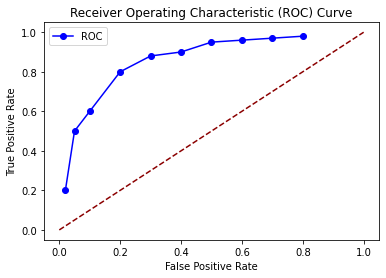

0.663


In [9]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC', marker = 'o')
    plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(ROC['FPR'], ROC['TPR'])
import sklearn.metrics as metrics
roc_auc = metrics.auc(ROC['FPR'], ROC['TPR'])
print(roc_auc)

In [10]:
ROC['FNR'] = 1 - ROC['TPR']

<ipython-input-10-78955b25d631>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ROC['FNR'] = 1 - ROC['TPR']


In [11]:
ROC2 = ROC[['Threshold']]
ROC2[['FPR']] = ROC[['FPR']]
ROC2[['FNR']] = ROC[['FNR']]

C:\Users\jason\anaconda3\envs\wheelie\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


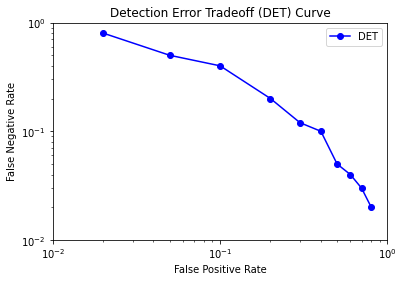

In [15]:
import matplotlib
def plot_det_curve(fpr, tpr):
    fig, ax = plt.subplots()
    plt.plot(fpr, tpr, color='blue', label='DET', marker = 'o')
    plt.xlabel('False Positive Rate')
    plt.ylabel('False Negative Rate')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Detection Error Tradeoff (DET) Curve')
    plt.legend()
    #plt.show()
    ax.set_xticks([0.01, 0.1, 1])
    ax.set_yticks([0.01, 0.1, 1])


#DETCurve(data['FPR'], data['FNR'])
plot_det_curve(ROC['FPR'], ROC['FNR'])

In [14]:
ROC2

,Threshold,FPR,FNR
0,1,0.02,0.80
1,5,0.05,0.50
2,10,0.10,0.40
3,15,0.20,0.20
4,20,0.30,0.12
5,25,0.40,0.10
6,30,0.50,0.05
7,35,0.60,0.04
8,40,0.70,0.03
9,50,0.80,0.02
